In [1]:
%pwd
%cd ../..

/home/rydevera3/data-science/umn_research/Deeplifting


In [2]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from deeplifting.problems import PROBLEMS_BY_NAME
from deeplifting.optimization import (
    run_deeplifting,
    run_differential_evolution,
    run_dual_annealing,
    run_ipopt,
    run_pygranso,
)
from deeplifting.utils import create_optimization_plot

In [3]:
problem_name = 'ex8_1_3'
problem = PROBLEMS_BY_NAME[problem_name]

In [4]:
# # Run pygranso
# outputs = run_pygranso(problem, trials=1)

In [5]:
outputs = run_deeplifting(problem, trials=10)



╔═════ QP SOLVER NOTICE ════════════════════════════════════════════════════════════════════════╗
║  PyGRANSO requires a quadratic program (QP) solver that has a quadprog-compatible interface,  ║
║  the default is osqp. Users may provide their own wrapper for the QP solver.                  ║
║  To disable this notice, set opts.quadprog_info_msg = False                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝
══════════════════════════════════════════════════════════════════════════════════════════════╗
PyGRANSO: A PyTorch-enabled port of GRANSO with auto-differentiation                          ║ 
Version 1.2.0                                                                                 ║ 
Licensed under the AGPLv3, Copyright (C) 2021-2022 Tim Mitchell and Buyun Liang               ║ 
══════════════════════════════════════════════════════════════════════════════════════════════╣
Problem specifications:  

/home/rydevera3/.pyenv/versions/3.9.16/lib/python3.9/site-packages/pygranso/private/bfgsHessianInverseLimitedMem.py:237: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  alpha[j,:]  = self.rho[0,j] * (self.S[:,j].T  @ q)


  10 ║  - │   -   ║  3.00000000001 ║   -  │   -  ║ QN │     1 │ 1.000000 ║     1 │ 9.50e-09   ║ 
═════╩════════════╩════════════════╩═════════════╩═══════════════════════╩════════════════════╣
Optimization results:                                                                         ║ 
F = final iterate, B = Best (to tolerance), MF = Most Feasible                                ║ 
═════╦════════════╦════════════════╦═════════════╦═══════════════════════╦════════════════════╣
   F ║    │       ║  3.00000000000 ║   -  │   -  ║    │       │          ║       │            ║ 
   B ║    │       ║  3.00000000000 ║   -  │   -  ║    │       │          ║       │            ║ 
═════╩════════════╩════════════════╩═════════════╩═══════════════════════╩════════════════════╣
Iterations:              11                                                                   ║ 
Function evaluations:    30                                                                   ║ 
PyGRANSO termination code: 0 --- 

In [6]:
%debug

ERROR:root:No traceback has been produced, nothing to debug.


In [7]:
results = outputs['final_results']

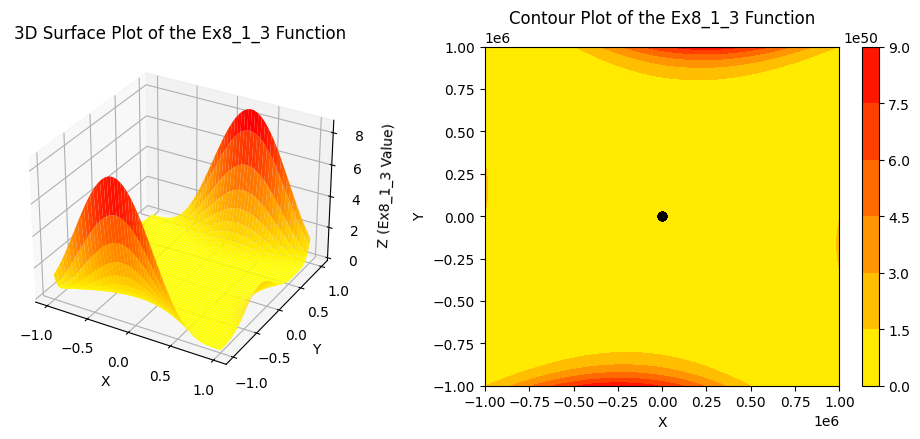

In [8]:
fig = create_optimization_plot(problem_name, problem, results, colormap='autumn_r')

In [9]:
fig.savefig(
    '/home/rydevera3/data-science/umn_research/Deeplifting'
    f'/images/{problem_name}_surface_and_contour-autumn.png'
)

In [10]:
results

[(0.5002035613556722,
  0.27504531477618693,
  3.0000000000000178,
  3.0000000000000178),
 (0.36004625316305594, 0.4033188413277597, 30.0, 30.0),
 (0.3585553046968973, 0.40834227900885894, 30.0, 30.0),
 (0.3713561484975405, 0.4118368277884042, 30.0, 30.0),
 (0.5003283334643243,
  0.28447007766119503,
  2.999999999999968,
  2.999999999999968),
 (0.3623225305111518, 0.40507415912103945, 30.0, 30.0),
 (0.5000710378529594,
  0.27957572830547534,
  2.999999999999968,
  2.999999999999968),
 (0.5009136409815907,
  0.2835241189183062,
  2.999999999999975,
  2.999999999999975),
 (0.49918867022427976,
  0.27638954297572194,
  3.000000000000071,
  3.000000000000071),
 (0.36278964004608766, 0.4024665284686793, 30.0, 30.0)]